# Importing Data in Python

In order to import data into Python, you should first have an idea of what files are in your working directory.

IPython, which is running on DataCamp's servers, has a bunch of cool commands, including its **magic commands** ([more](https://ipython.readthedocs.io/en/stable/overview.html#main-features-of-the-interactive-shell)). For example, starting a line with `!` gives you complete system shell access. This means that the IPython magic command `! ls` will display the contents of your current directory. 

In [40]:
#! ls

You can also do this natively in Python using the library `os`, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library os, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.

In [38]:
import os
wd = os.getcwd()
os.listdir(wd)[:5]

['310_Python_Basics.ipynb',
 '120_Rescaling.ipynb',
 '010_Data_Science.ipynb',
 '985_Books.ipynb',
 '435_kMeans_Clustering.ipynb']

## Flat Files
### Importing entire plain text files

In [2]:
# Open a file: file
file = open('data/moby_dick.txt', mode='r')

# Print it
print(file.read())

# Check whether file is closed
print(file.closed)

# Close file
file.close()

# Check whether file is closed
print(file.closed)

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

### Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `readline()` method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

You can bind a variable file by using a **context manager** construct:

`with open('moby_dick.txt') as file:`

While still within this construct, the variable `file` will be bound to `open('huck_finn.txt');` thus, to print the file to the shell, all the code you need to execute is:

In [4]:
with open('data/moby_dick.txt') as file:
    print(file.readline())

CHAPTER 1. Loomings.



In [5]:
# Read & print the first 3 lines
with open('data/moby_dick.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



A **flat file** is a text file containg structured data (records, rows of fields or attributes), for example table data. Flat files can have a header, first row containing fields/attributes/column names.

### Importing flat files using NumPy

<class 'numpy.ndarray'>


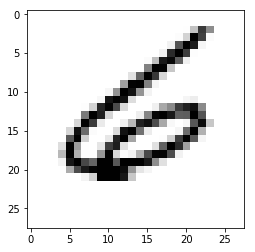

In [10]:
# Import package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# From: http://yann.lecun.com/exdb/mnist/

# Assign filename to variable: file
file = 'data/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show();

There are a number of arguments that `np.loadtxt()` takes that you'll find useful: `delimiter` changes the delimiter that `loadtxt()` is expecting, for example, you can use ',' and '\t' for comma-delimited and tab-delimited respectively; `skiprows` allows you to specify how many rows (not indices) you wish to skip; `usecols` takes a list of the indices of the columns you wish to keep.

Complete the arguments of `np.loadtxt()`: the file you're importing is tab-delimited, you want to skip the first row and you only want to import the first and third columns.

In [17]:
# Import numpy
import numpy as np

# Assign the filename: file
file = 'data/digits_header.txt'

# Load the data: data
data = np.loadtxt(file, delimiter='\t', skiprows=1, usecols=[0,2])

# Print data
#print(data)[:]
data[:10]

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [4., 0.],
       [0., 0.],
       [0., 0.],
       [7., 0.],
       [3., 0.],
       [5., 0.],
       [3., 0.]])

### Importing different datatypes

The file `seaslug.txt`: 
- has a text header, consisting of strings
- is tab-delimited.

These data consists of percentage of sea slug larvae that had metamorphosed in a given time period. [Read more here](http://www.stat.ucla.edu/~rgould/datasets/aboutseaslugs.html).

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it could not convert string to float. There are two ways to deal with this: 
- firstly, you can set the data type argument `dtype` equal to str (for string).
- Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

['Time' 'Percent']
[0.    0.357]


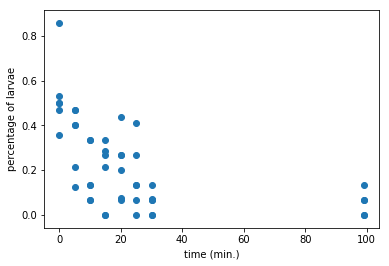

In [18]:
# Assign filename: file
file = 'data/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show();

Much of the time you will need to import datasets which have **different datatypes in different columns**; one column may contain strings and another floats, for example. The function `np.loadtxt()` will freak at this. There is another function, `np.genfromtxt()`, which can handle such structures. If we pass `dtype=None` to it, it will figure out what types each column should be.

Here, the first argument is the `filename`, the second specifies the `delimiter` , and the third argument `names` tells us there is a header. Because the data are of different types, data is an object called a structured array. Because numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. You can test this by checking out the array's shape in the shell by executing `np.shape(data)`.

Accessing rows and columns of structured arrays is super-intuitive: to get the ith row, merely execute `data[i]` and to get the column with name 'Fare', execute `data['Fare']`.

In [19]:
data = np.genfromtxt('data/titanic.csv', delimiter=',', names=True, dtype=None)
np.shape(data)

/Users/ksatola/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


(891,)

In [23]:
data[:5]

array([(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S'),
       (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C'),
       (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S'),
       (4, 1, 1, b'female', 35., 1, 0, b'113803', 53.1   , b'C123', b'S'),
       (5, 0, 3, b'male', 35., 0, 0, b'373450',  8.05  , b'', b'S')],
      dtype=[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')])

In [24]:
data[0]

(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171', 7.25, b'', b'S')

In [26]:
data['Fare'][:5]

array([ 7.25  , 71.2833,  7.925 , 53.1   ,  8.05  ])

In [28]:
data['Survived'][-4:]

array([1, 0, 1, 0])

To import data containing mixed datatypes, there is also another function `np.recfromcsv()` that behaves similarly to `np.genfromtxt()`, except that its default dtype is None. 

In [29]:
# Assign the filename: file
file = 'data/titanic.csv'

# Import file using np.recfromcsv: d
d = np.recfromcsv(file, delimiter=',', names=True, dtype=None)

# Print out first three entries of d
print(d[:3])

[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]


/Users/ksatola/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2315: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


### Importing flat files using pandas

In the last exercise, you were able to import flat files containing columns with different datatypes as numpy arrays. However, the **DataFrame** object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as DataFrames using the pandas functions `read_csv()` and `read_table()`.

In [31]:
# Import pandas as pd
import pandas as pd

# Assign the filename: file
file = 'data/titanic.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(file)

# View the head of the DataFrame
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Assign the filename: file
file = 'data/digits.csv'

# Read the first 5 rows of the file into a DataFrame: data
data = pd.read_csv(file, nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


The pandas package is also great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values. Note that missing values are also commonly referred to as `NA` or `NaN`.You're now going to import a slightly corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which
- contains comments after the character '#'
- is tab-delimited.

Complete the sep (the pandas version of delim), comment and na_values arguments of `pd.read_csv()`. `comment` takes characters that comments occur after in the file, which in this case is '#'. `na_values` takes a list of strings to recognize as NA/NaN, in this case the string 'Nothing'.

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket    Fare Cabin Embarked  
0         A/5 21171   7.250   NaN       S   
1          PC 17599     NaN   NaN      NaN  
2  STON/O2. 3101282   7.925   NaN        S  
3            113803  53.100  C123        S  
4            373450   8.050   NaN        S  


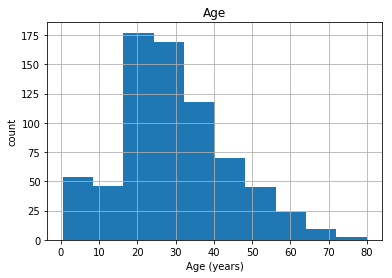

In [34]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Assign filename: file
file = 'data/titanic_corrupt.txt'

# Import file: data
data = pd.read_csv(file, sep='\t', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show();

## Loading a pickled file

There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can **serialize** them. All this means is converting the object into a sequence of bytes, or a bytestream.

You'll import the `pickle` package, open a previously pickled data structure from a file and load it.

In [41]:
# Import pickle package
import pickle

In [43]:
data = {'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}

# open a file, where you ant to store the data
file = open('data/data.pkl', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

In [44]:
# Open pickle file and load data: d
with open('data/data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


## Importing Excel files

Given an **Excel file** imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

Specifically, you'll be loading and checking out the spreadsheet `'battledeath.xlsx'`, modified from the Peace Research Institute Oslo's (PRIO) [dataset](https://www.prio.org/Data/Armed-Conflict/Battle-Deaths/The-Battle-Deaths-Dataset-version-30/). This data contains age-adjusted mortality rates due to war in various countries over several years.

In [46]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'data/battledeath.xlsx'

# Load spreadsheet: xl
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


Import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

In [47]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

# Load the first sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931
  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


Add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

Parse the first sheet by index. In doing so, skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. The values passed to `skiprows` and `names` all need to be of type list.

Parse the second sheet by index. In doing so, parse only the first column with the `usecols` parameter, skip the first row and rename the column 'Country'. The argument passed to `usecols` also needs to be of type list.

In [48]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


## Importing SAS / Stata files using pandas

In [50]:
#! pip install sas7bdat

  Running setup.py bdist_wheel for sas7bdat ... done
  Stored in directory: /Users/ksatola/Library/Caches/pip/wheels/e0/b0/d2/5d251f0c159a251ec247d9d7f6db889b2c396b2f247a64e5c4
Successfully built sas7bdat


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

from sas7bdat import SAS7BDAT 

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


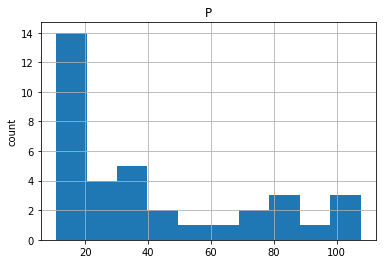

In [54]:
# Import sas7bdat package
from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('data/sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show();

### Importing Stata Files

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8   ...    disa16  disa17  disa18  disa19  disa20  disa21  \
0   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
1   0.56    0.0   ...       0.0     0.4     0.0    0.61    0.00     0.0   
2   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
3   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.00     0.0   
4   0.00    0.0   ...       0.0     0.0     0.0    0.00    0.05     0.0   

   disa22  disa23  disa24  disa25  
0    0.00    0.02    0.00    0.00  
1    0.99    0.98   

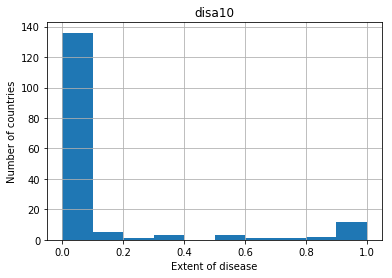

In [56]:
# Import pandas
import pandas as pd

# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('data/disarea.dta')

# Print the head of the DataFrame df
print(df.head())

# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show();

## Importing HDF5 files